In [18]:
push!(LOAD_PATH, "../src")

using MyProject.Utils
using MyProject.Estimators
using MyProject.StochasticLanczos
using LinearAlgebra
using Plots

In [19]:
include("test_cases/test_case_4.jl");

In [46]:
s = 60
b = 60
k_converged = 30
Ω_provided = rand([-1,1], n, s)
converged_estimate = hutchinson_estimator(f, matvecA, n, s, b, k_converged; Ω_provided=Ω_provided, 
    reorthogonalization_fraction=1.0)

256149.19404221766

In [47]:
ks = collect(1:1:20)
bs = divisors(s)
partial_hutchinson_estimator = (b, k) -> 
                hutchinson_estimator(f, matvecA, n, s, b, k; Ω_provided=Ω_provided, reorthogonalization_fraction=0.1)
block_estimates = compute_block_estimates(ks, bs, partial_hutchinson_estimator);

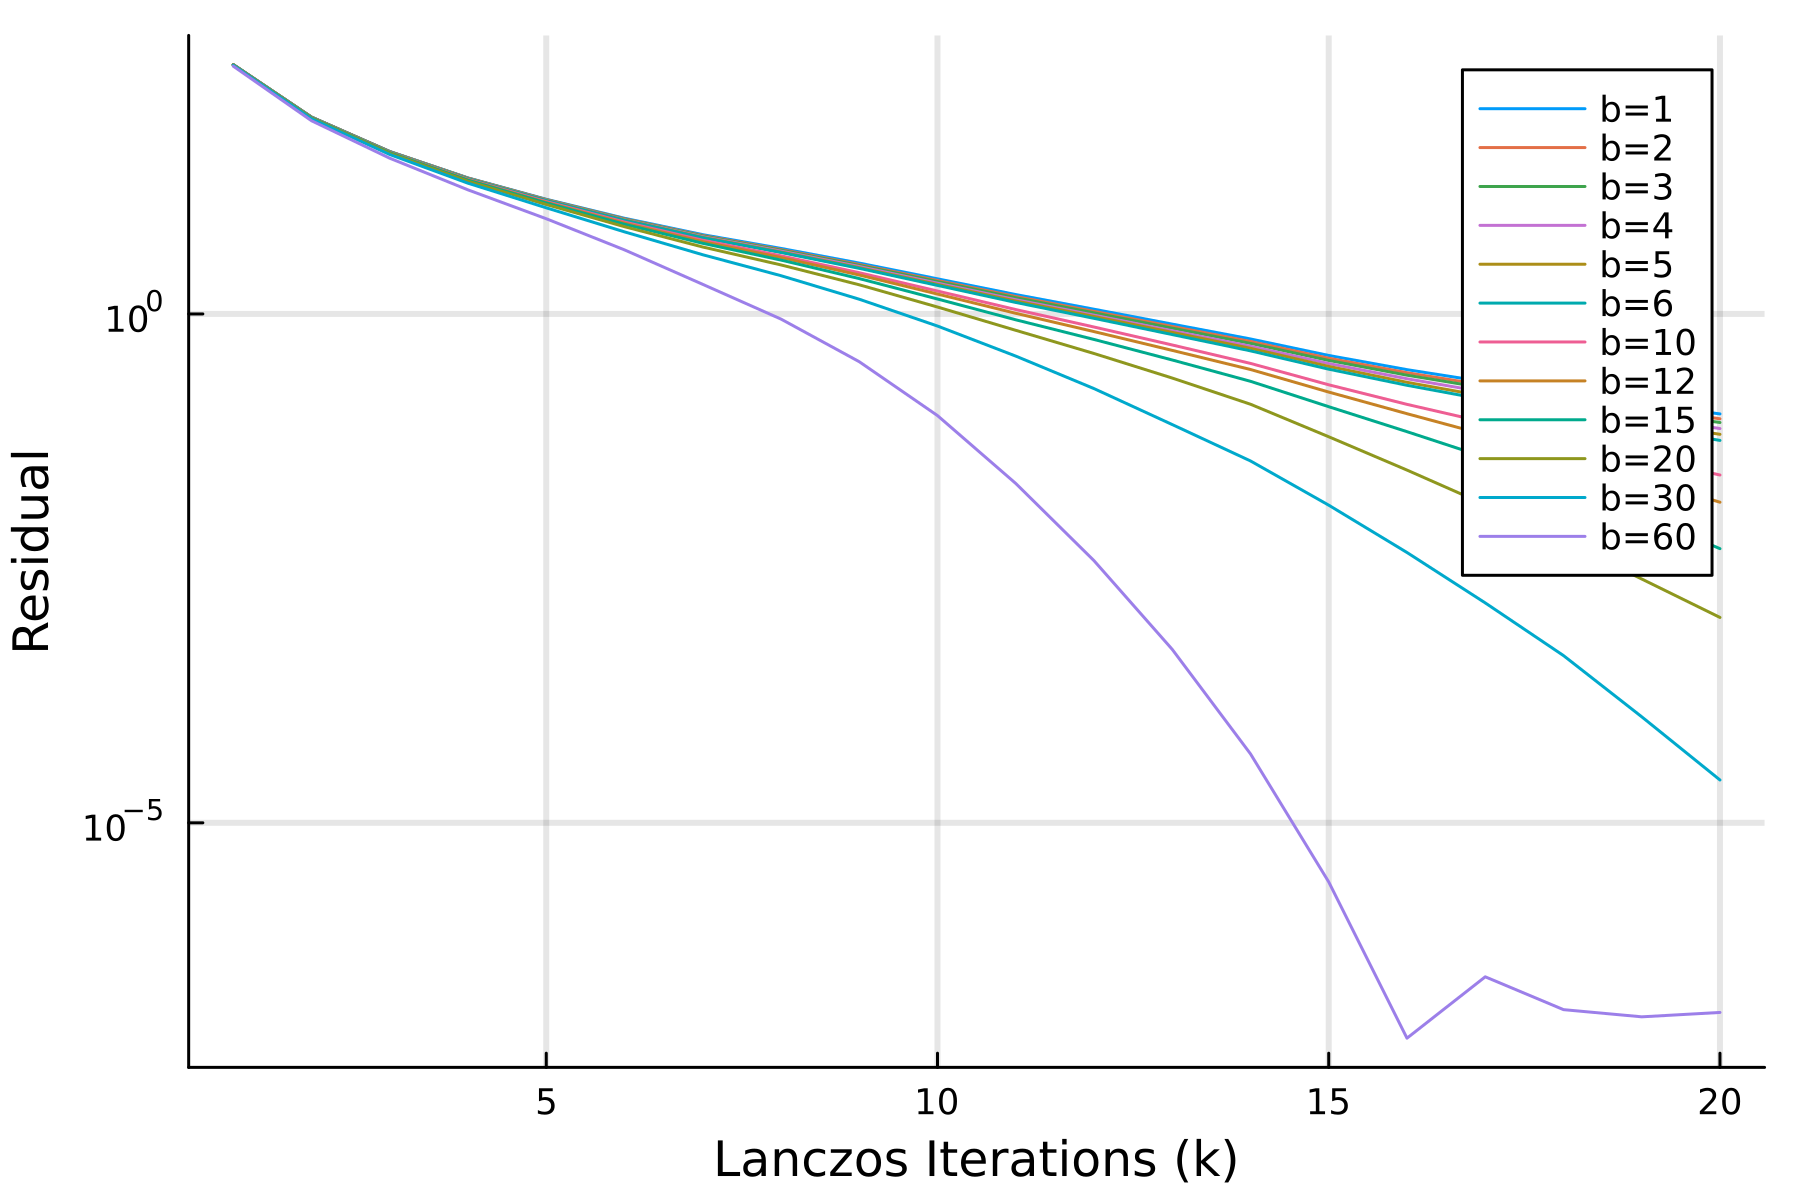

In [48]:
p = plot_block_estimates(block_estimates, ks, bs, converged_estimate; k_max=ks[end], logscale=true)
plot!(dpi=300)

In [23]:
savefig("lanczos_convergence_plot.png")

"/home/mlouis9/shared/Educational Stuffs/Classes/Fall 2024/Iterative Methods/MyProject/test/lanczos_convergence_plot.png"